In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [ ]:
#Load the training and testing data (MNIST)¶

In [2]:
#importing dataset and splitting into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#to se length of traning dataset
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
#we want to see first image
x_train[0]
#It is showing image of matrix of size 28*28 pixels(Total 784 features)
#each feature represents the intensity between 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

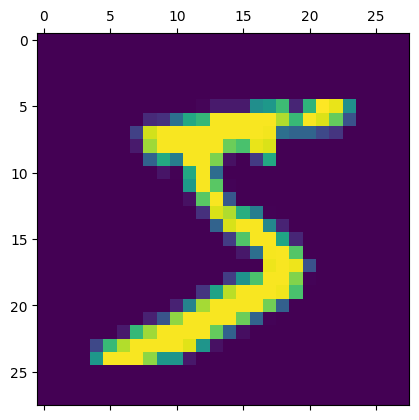

In [7]:
#to see how first image look
plt.matshow(x_train[0])

In [8]:
#normalize the images by scaling pixel intensities to the range 0,1
#Normalization is a technique for organizing data in a database.
x_train = x_train / 255
x_test = x_test / 255
x_train[0]

#here 255 is maximum value of intensity that's why it is divided by 255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#Creating the model
#The ReLU function is one of the most popular activation functions. It stands for “rectified linear unit”. Mathematically this function is defined as: y = max(0,x)The ReLU function returns “0” if the input is negative and is linear if the input is positive.

#The softmax function is another activation function. It changes input values into values that reach from 0 to 1.

In [9]:
model = keras.Sequential([
	keras.layers.Flatten(input_shape = (28,28)),
	keras.layers.Dense(128, activation='relu'),
	keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Compile the model

In [10]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
#Train the model

In [11]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6432 - accuracy: 0.8353 - val_loss: 0.3623 - val_accuracy: 0.9032
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3367 - accuracy: 0.9065 - val_loss: 0.2961 - val_accuracy: 0.9194
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2882 - accuracy: 0.9192 - val_loss: 0.2619 - val_accuracy: 0.9269
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2589 - accuracy: 0.9268 - val_loss: 0.2429 - val_accuracy: 0.9315
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2364 - accuracy: 0.9340 - val_loss: 0.2220 - val_accuracy: 0.9364
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2183 - accuracy: 0.9390 - val_loss: 0.2061 - val_accuracy: 0.9416
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2030 - accuracy: 0.9432 - val_loss: 0.1930 - val_accur

In [ ]:
#Evaluate the model

In [12]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.1631 - accuracy: 0.9555
loss=0.163
Accuracy=0.956


In [ ]:
#Making Prediction on New Data

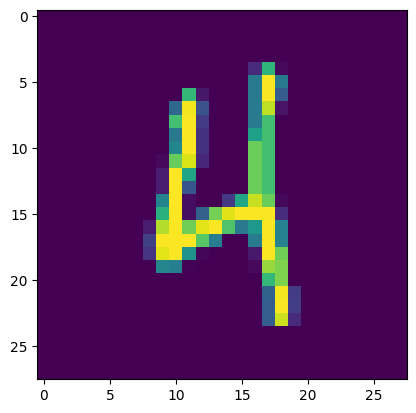

In [13]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [14]:
#we use predict() on new data
predicted_value = model.predict(x_test)
print("Handwritten number in the image is=%d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 2s 4ms/step
Handwritten number in the image is=4


In [ ]:
#Plot graph for Accuracy and Loss

In [15]:
history.history??

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

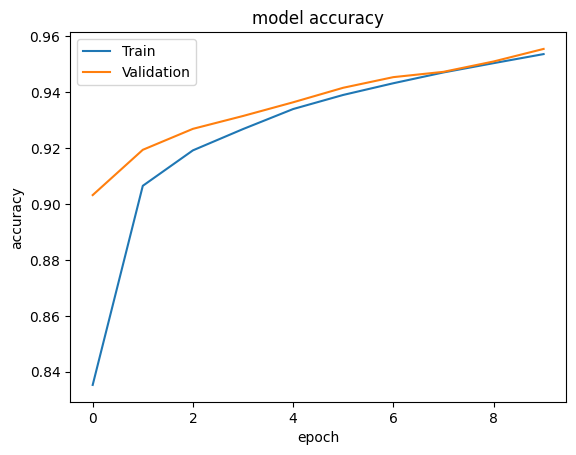

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

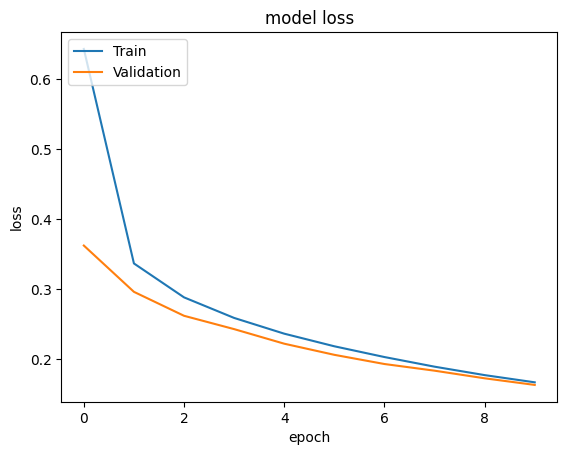

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

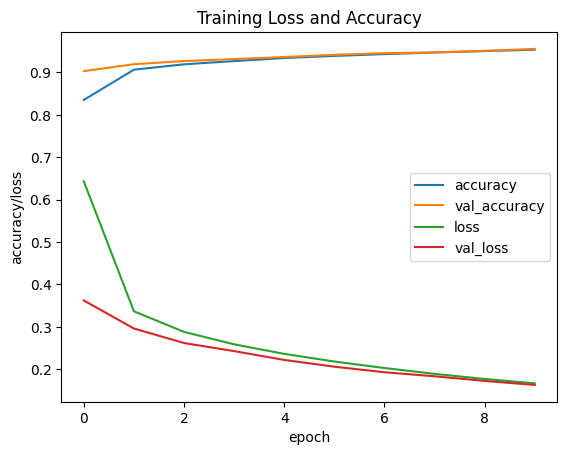

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and Accuracy')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy','loss','val_loss'])
plt.show()

In [ ]:
Conclusion: With above code We can see, that throughout the epochs, our model accuracy increases and our model loss decreases,that is good since our model gains confidence with its predictions.

The two losses (loss and val_loss) are decreasing and the accuracy (accuracy and val_accuracy)are increasing. So this indicates the model is trained in a good way.

The val_accuracy is the measure of how good the predictions of your model are. So In this case, it looks like the model is well trained after 10 epochs

In [ ]:
#Save the model

In [20]:
pwd

'C:\\Users\\Admin\\DL Practicals'

In [21]:
keras_model_path='C:\\Users\\Admin\\DL Practicals'

In [22]:
model.save(keras_model_path)

INFO:tensorflow:Assets written to: C:\Users\Admin\DL Practicals\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\DL Practicals\assets


In [23]:
INFO:tensorflow:Assets written to: /home/rmdstic/LP4/assets

SyntaxError: invalid syntax (133233796.py, line 1)

In [24]:
restored_keras_model = tf.keras.models.load_model(keras_model_path)